# Alternative Data Exploration and Education Outcomes
## Introduction

Last spring, in a psychology class called "Mind", I had a professor lecture about Environmental Neuroscience. She talked about effects an individual's environment can have on behavior and health, and one of the most striking examples she presented was a study on Public Housing in Chicago. In their research, [Taylor, Kuo and Sullivan (2001)]("http://lhhl.illinois.edu/all.scientific.articles.htm") studied views from windows in Robert Taylor Public Housing and classified them as either having good or poor nature views. They found that kids with more nature views had better memory, attention, and self-discipline.

While looking though Open Source Data to see what kinds of data might be interesting to play with, I came across the NYC [2015 Tree Census Data]("https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh"). This dataset lists over 683k trees and their precise location. Coupled with education data that NYC has, I thought this could potentially be an interesting use case to see how alternative data could be applied as a potential way to reframe and rethink about problem spaces.

All of my data comes from NYC Open data: I used [2012 SAT results]("https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4"), [School Locations]("https://data.cityofnewyork.us/Education/2017-2018-School-Locations/p6h4-mpyy"), [2012 Demographics and Accountability]("https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j"), and [2015 Tree Census Data]("https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh").

Most preprocessing has already been done in data_cleaning.py


## Finish Preprocessing Data

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [125]:
schools = pd.read_csv('nyc_schools.csv', usecols=['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers', 'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score', 'X_COORDINATE', 'Y_COORDINATE', 'NTA', 'NTA_NAME', 'grade9', 'grade10', 'grade11', 'grade12', 'ell_percent', 'sped_percent', 'asian_per', 'white_per', 'black_per', 'hispanic_per', 'male_per', 'total', 'enrollment'])
trees = pd.read_csv('nyc_trees.csv', usecols=['tree_id', 'status', 'x_sp', 'y_sp', 'nta', 'nta_name', 'borough'])

In [126]:
# Rename columns
schools = schools.rename(columns={"SAT Critical Reading Avg. Score": "crit_reading", "SAT Math Avg. Score": "math", "SAT Writing Avg. Score": "writing"})

In [127]:
# Create column containing Borough school is in from NTA
boro = []
for i in range(schools['DBN'].count()):
    n = schools['NTA'][i]
    b = n[:2]
    boro.append(b)

In [128]:
# Create One Hot Encoding for each Borough
schools['boro'] = boro
boro_dummy = pd.get_dummies(schools['boro'], prefix='boro')

In [129]:
# Join Schools data with Borough data
schools = schools.join(boro_dummy)

In [130]:
schools.describe()

,Num of SAT Test Takers,crit_reading,math,writing,grade9,grade10,grade11,grade12,ell_percent,sped_percent,...,male_per,X_COORDINATE,Y_COORDINATE,total,enrollment,boro_BK,boro_BX,boro_MN,boro_QN,boro_SI
count,366.000000,366.000000,366.000000,366.000000,357.000000,366.000000,365.000000,363.000000,366.000000,366.000000,...,366.000000,3.660000e+02,366.000000,366.000000,355.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,119.234973,404.284153,418.852459,397.964481,218.719888,206.527322,168.419178,154.983471,12.940984,13.489344,...,49.343443,1.004440e+06,208905.696721,1221.101093,752.408451,0.300546,0.224044,0.273224,0.172131,0.030055
std,163.965581,59.260984,67.067295,61.172797,256.504452,243.923631,204.141104,189.993893,20.466643,7.240194,...,12.872913,1.988213e+04,29712.330051,182.279773,883.581675,0.459123,0.417522,0.446225,0.378011,0.170971
min,6.000000,279.000000,312.000000,286.000000,1.000000,19.000000,9.000000,1.000000,0.000000,0.000000,...,0.000000,9.304770e+05,131756.000000,887.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,370.000000,376.000000,363.000000,98.000000,94.000000,74.000000,66.000000,2.600000,9.000000,...,43.900000,9.894418e+05,187451.750000,1108.000000,349.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,394.500000,401.000000,384.000000,129.000000,117.000000,95.000000,87.000000,6.250000,14.100000,...,49.500000,1.003637e+06,206489.000000,1181.000000,426.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,101.000000,423.000000,442.500000,414.750000,185.000000,170.750000,138.000000,131.500000,13.125000,18.775000,...,54.500000,1.013345e+06,236884.750000,1271.000000,604.500000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1277.000000,679.000000,735.000000,682.000000,1413.000000,1462.000000,1319.000000,1201.000000,94.600000,32.900000,...,100.000000,1.059389e+06,262923.000000,2096.000000,5332.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
trees.describe()

,tree_id,x_sp,y_sp
count,683788.000000,6.837880e+05,683788.000000
mean,365205.011085,1.005280e+06,194798.424625
std,208122.092902,3.428505e+04,32902.061114
min,3.000000,9.133493e+05,120973.792200
25%,186582.750000,9.896578e+05,169515.153700
50%,366214.500000,1.008386e+06,194560.252500
75%,546170.250000,1.029991e+06,217019.571950
max,722694.000000,1.067248e+06,271894.092100


In [92]:
trees['status'].unique()

array(['Alive', 'Stump', 'Dead'], dtype=object)

In [93]:
# Create separate df for each type of tree
alive = trees[trees['status']=='Alive']
stump = trees[trees['status']=='Stump']
dead = trees[trees['status']=='Dead']

## Understanding the data through visualization

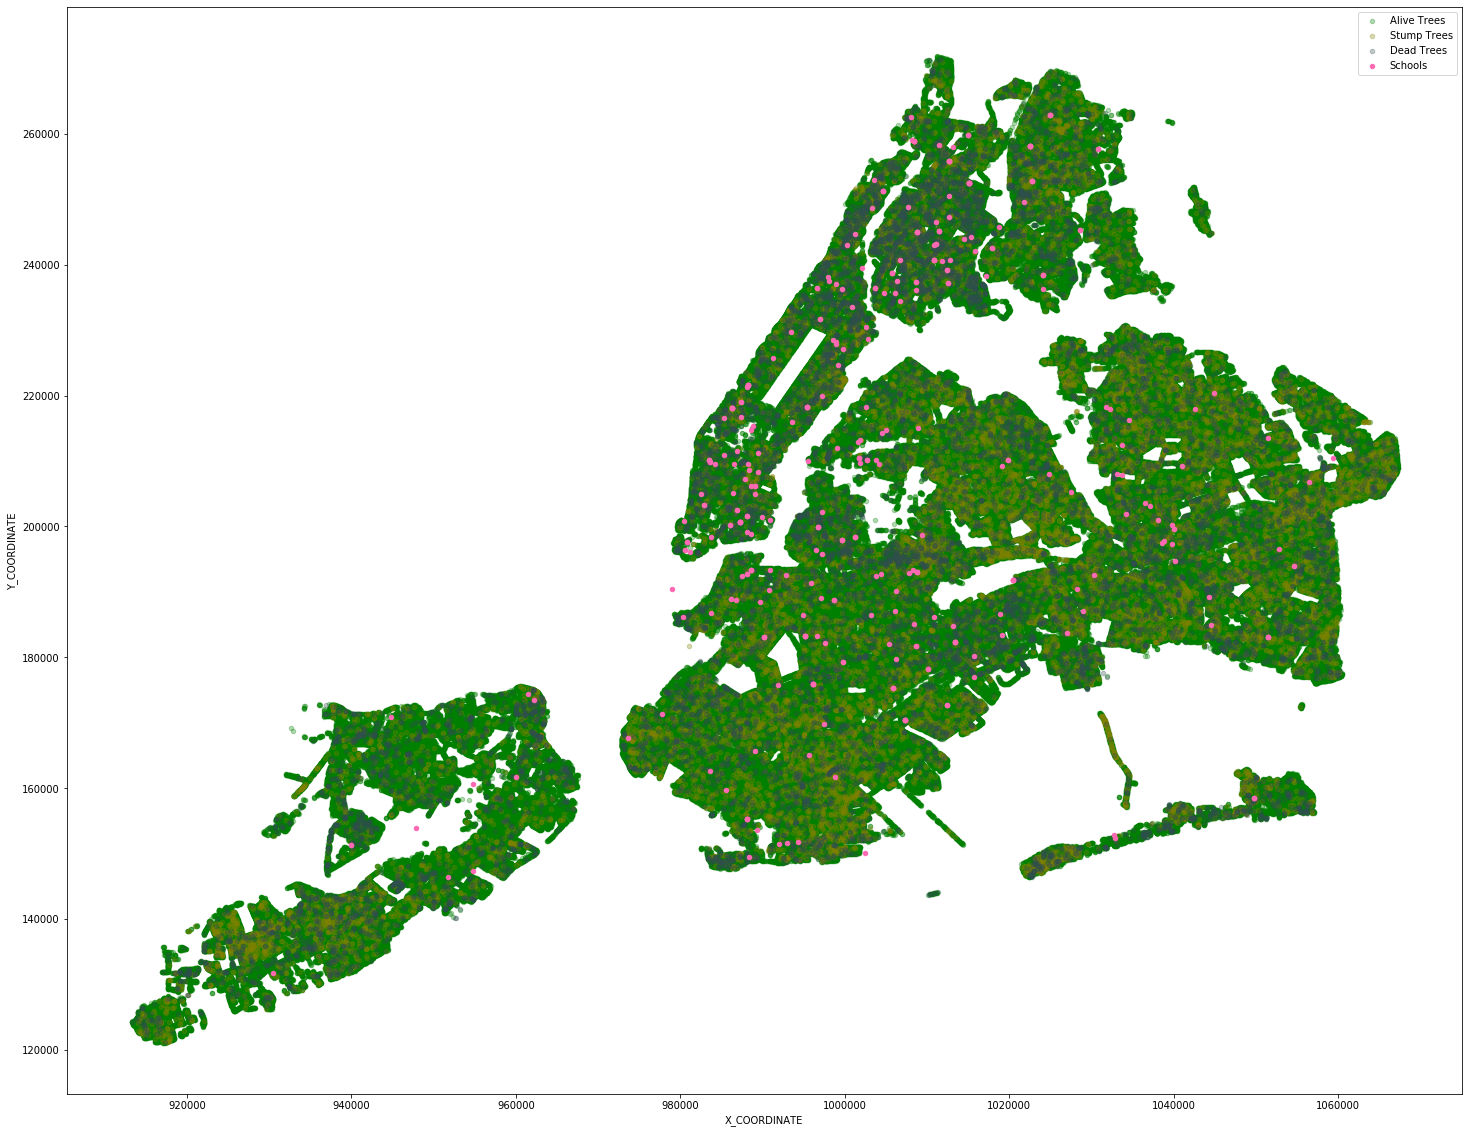

In [21]:
# DATA VISUALIZATION 1: All of the trees in NYC + High Schools
plot = alive.plot(kind='scatter', x='x_sp', y='y_sp', color='green', label='Alive Trees', alpha = .3, figsize=(25, 20))
stump.plot(kind='scatter', x='x_sp', y='y_sp', color='olive', label='Stump Trees', alpha = .3, ax=plot)
dead.plot(kind='scatter', x='x_sp', y='y_sp', color='darkslategrey', label='Dead Trees', alpha = .3, ax=plot)
schools.plot.scatter(x='X_COORDINATE', y='Y_COORDINATE', c='hotpink', label='Schools', ax=plot)

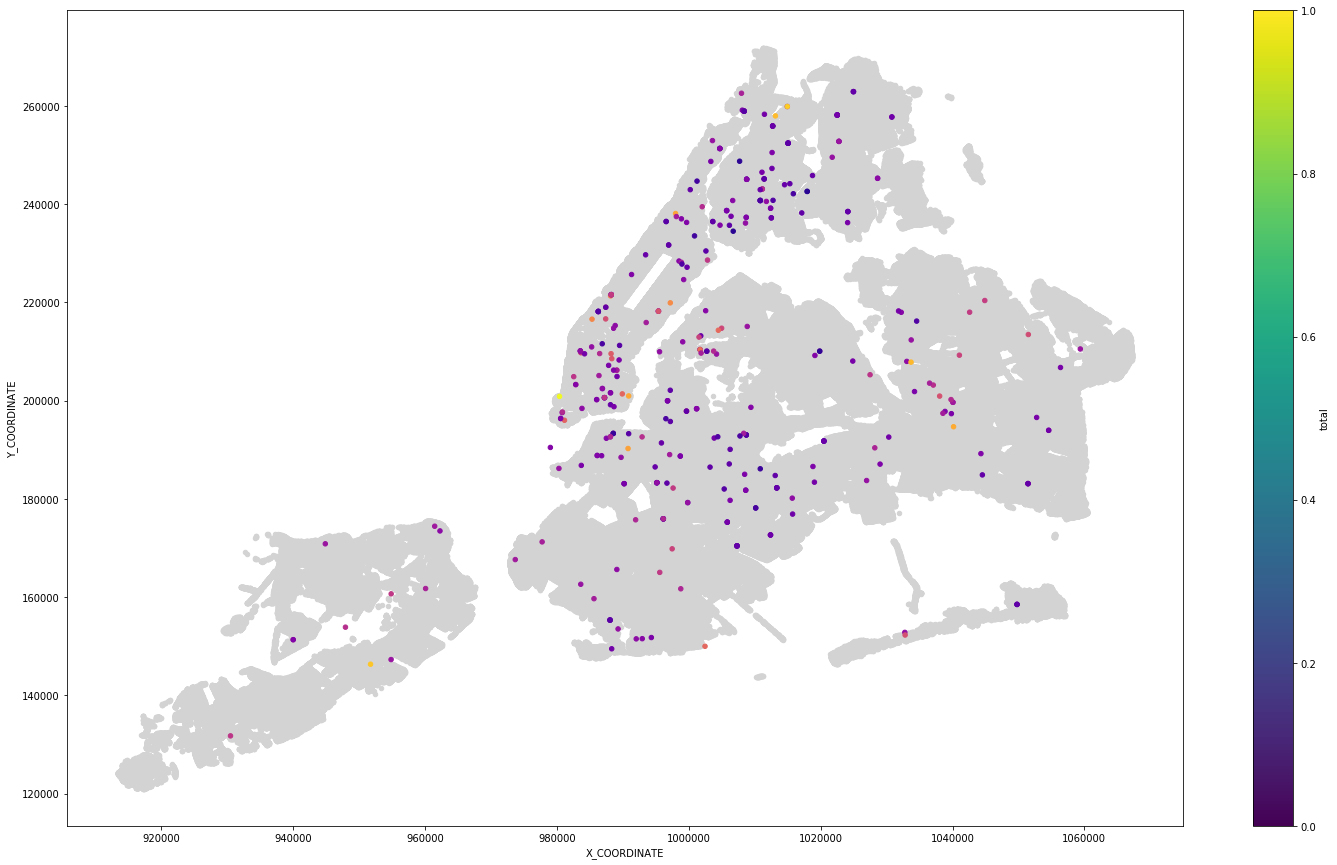

In [33]:
# DATA VISUALIZATION 2: SAT Scores by High School
plot = alive.plot(kind='scatter', x='x_sp', y='y_sp', color='lightgrey', figsize=(25, 15))
schools.plot.scatter(x='X_COORDINATE', y='Y_COORDINATE', c='total', colormap='plasma', ax=plot)

From the visualization we can see that there are a handful of schools that have average SAT score far higher than most NYC high schools (mean = 1221, med = 1181). Digging a little further, we see that these are all top schools in NYC are schools that are well known for high academic acheivement.

In [32]:
top_schools = schools.sort_values(by=['total'], ascending=False)
top_schools[['SCHOOL NAME', 'crit_reading', 'math', 'writing', 'total']].head(10)

,SCHOOL NAME,crit_reading,math,writing,total
38,STUYVESANT HIGH SCHOOL,679,735,682,2096
152,BRONX HIGH SCHOOL OF SCIENCE,632,688,649,1969
358,STATEN ISLAND TECHNICAL HIGH SCHOOL,635,682,636,1953
156,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,636,648,636,1920
304,TOWNSEND HARRIS HIGH SCHOOL,621,651,638,1910
330,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,612,660,596,1868
8,BARD HIGH SCHOOL EARLY COLLEGE,624,604,628,1856
85,"HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...",605,654,588,1847
186,BROOKLYN TECHNICAL HIGH SCHOOL,587,659,587,1833
30,ELEANOR ROOSEVELT HIGH SCHOOL,572,594,592,1758


In [131]:
# Defining area around a High School to look for trees
schools['x_min'] = schools['X_COORDINATE'] - 300
schools['x_max'] = schools['X_COORDINATE'] + 300
schools['y_min'] = schools['Y_COORDINATE'] - 300
schools['y_max'] = schools['Y_COORDINATE'] + 300
schools = schools.reset_index(drop=True)

In [132]:
# Find number of trees around each High School
all_trees = []
alive_trees = []
stump_trees = []
dead_trees = []

for i in range(schools['DBN'].count()):
    t = trees[(trees['x_sp'] <= schools['x_max'][i]) & (trees['x_sp'] >= schools['x_min'][i])& (trees['y_sp'] <= schools['y_max'][i]) & (trees['y_sp'] >= schools['y_min'][i])]['tree_id'].count()
    a = trees[(trees['x_sp'] <= schools['x_max'][i]) & (trees['x_sp'] >= schools['x_min'][i])& (trees['y_sp'] <= schools['y_max'][i]) & (trees['y_sp'] >= schools['y_min'][i]) & (trees['status'] == 'Alive')]['tree_id'].count()
    s = trees[(trees['x_sp'] <= schools['x_max'][i]) & (trees['x_sp'] >= schools['x_min'][i])& (trees['y_sp'] <= schools['y_max'][i]) & (trees['y_sp'] >= schools['y_min'][i]) & (trees['status'] == 'Stump')]['tree_id'].count()
    d = trees[(trees['x_sp'] <= schools['x_max'][i]) & (trees['x_sp'] >= schools['x_min'][i])& (trees['y_sp'] <= schools['y_max'][i]) & (trees['y_sp'] >= schools['y_min'][i]) & (trees['status'] == 'Dead')]['tree_id'].count()

    all_trees.append(t)
    alive_trees.append(a)
    stump_trees.append(s)
    dead_trees.append(d)

In [133]:
schools['trees'] = all_trees
schools['alive_trees'] = alive_trees
schools['stump_trees'] = stump_trees
schools['dead_trees'] = dead_trees

In [134]:
schools.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,crit_reading,math,writing,grade9,grade10,grade11,grade12,...,boro_QN,boro_SI,x_min,x_max,y_min,y_max,trees,alive_trees,stump_trees,dead_trees
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,98.0,79,80.0,50.0,...,0,0,987817.0,988417.0,198874.0,199474.0,51,49,0,2
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,109.0,97,93.0,95.0,...,0,0,988350.0,988950.0,198476.0,199076.0,31,30,0,1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,101.0,93,77.0,86.0,...,0,0,988808.0,989408.0,204627.0,205227.0,60,58,2,0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,131.0,49,44.0,NaN,...,0,0,986592.0,987192.0,202172.0,202772.0,62,61,0,1
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,143.0,100,51.0,73.0,...,0,0,987820.0,988420.0,201307.0,201907.0,69,68,0,1


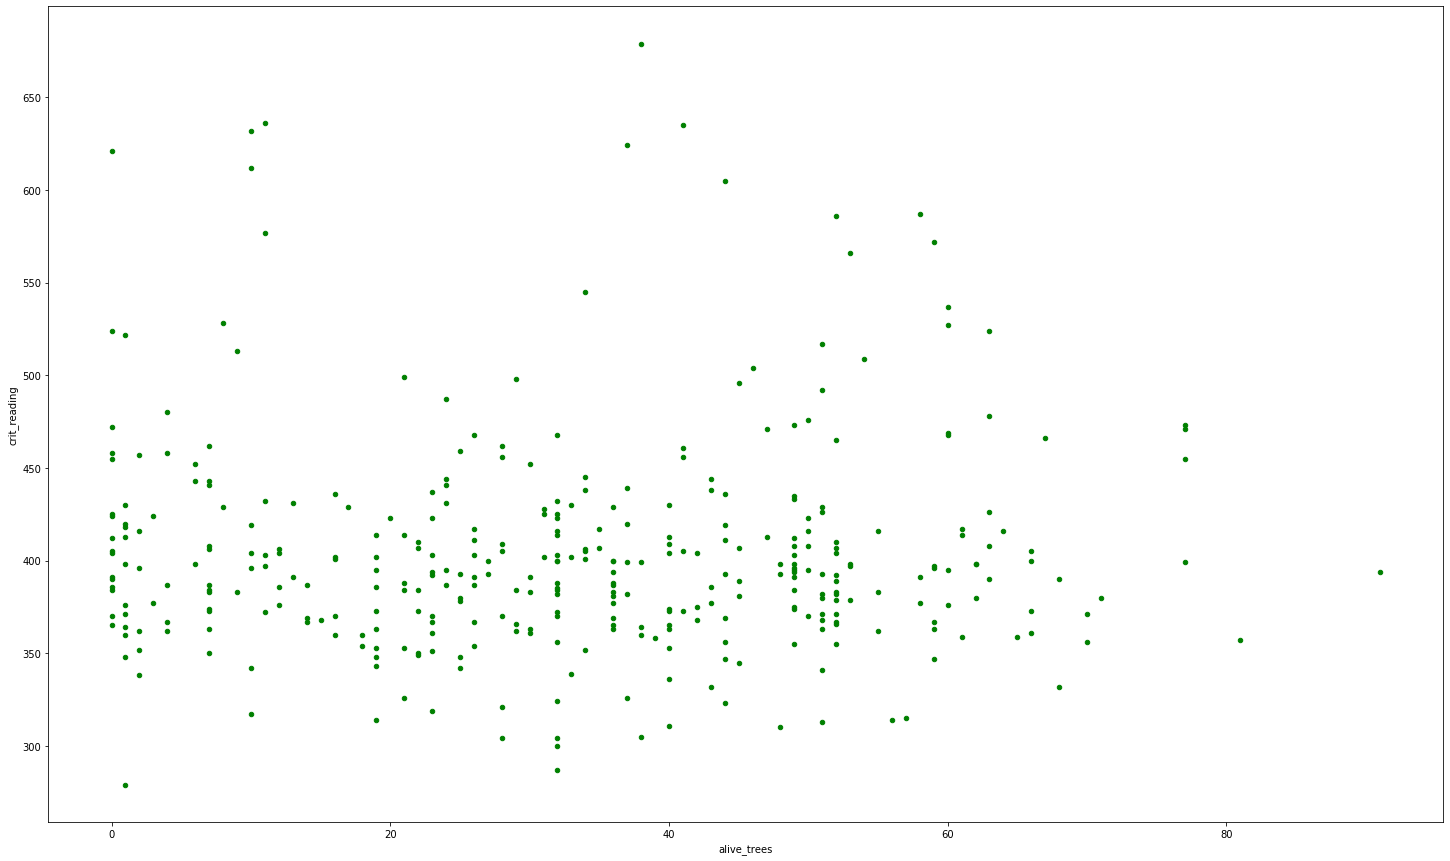

In [78]:
plot = schools.plot(kind='scatter', x='alive_trees', y='crit_reading', color='green', figsize=(25, 15))
# schools.plot(kind='scatter', x='alive_trees', y='math', color='blue', figsize=(25, 15))
# schools.plot(kind='scatter', x='alive_trees', y='writing', color='orangered', figsize=(25, 15))

## Try Aggregation on Borough level 

In [135]:
bk = schools[schools['boro']=='BK'].copy()
bk['cumul'] = bk['Num of SAT Test Takers'] * bk['total']
bk_avg = bk['cumul'].sum() / bk['Num of SAT Test Takers'].sum()

bx = schools[schools['boro']=='BX'].copy()
bx['cumul'] = bx['Num of SAT Test Takers'] * bx['total']
bx_avg = bk['cumul'].sum() / bx['Num of SAT Test Takers'].sum()

mn = schools[schools['boro']=='MN'].copy()
mn['cumul'] = mn['Num of SAT Test Takers'] * mn['total']
mn_avg = mn['cumul'].sum() / mn['Num of SAT Test Takers'].sum()

qn = schools[schools['boro']=='QN'].copy()
qn['cumul'] = qn['Num of SAT Test Takers'] * qn['total']
qn_avg = qn['cumul'].sum() / qn['Num of SAT Test Takers'].sum()

si = schools[schools['boro']=='SI'].copy()
si['cumul'] = si['Num of SAT Test Takers'] * si['total']
si_avg = si['cumul'].sum() / si['Num of SAT Test Takers'].sum()

In [136]:
boro_scores = [bk_avg, bx_avg, mn_avg, qn_avg, si_avg]


In [137]:
bk_trees = trees[trees['borough']=='Brooklyn']['borough'].count()
bx_trees = trees[trees['borough']=='Bronx']['borough'].count()
mn_trees = trees[trees['borough']=='Manhattan']['borough'].count()
qn_trees = trees[trees['borough']=='Queens']['borough'].count()
si_trees = trees[trees['borough']=='Staten Island']['borough'].count()

In [138]:
boro_trees = [bk_trees, bx_trees, mn_trees, qn_trees, si_trees]

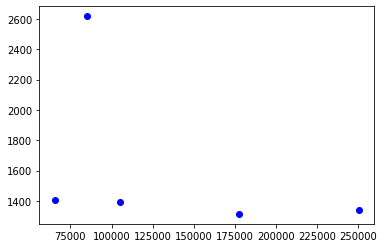

In [139]:
plt.scatter(boro_trees, boro_scores, c='blue')

## Regression

In [55]:
import statsmodels.formula.api as sm

In [74]:
regression = schools[['total', 'math', 'crit_reading', 'writing', 'enrollment', 'asian_per', 'black_per', 'hispanic_per' , 'white_per', 'male_per' , 'boro_BK' , 'boro_BX' ,'boro_MN' , 'boro_QN' , 'boro_SI', 'trees', 'alive_trees', 'stump_trees', 'dead_trees']].copy()
regression.corr(method ='pearson') 

,total,math,crit_reading,writing,enrollment,asian_per,black_per,hispanic_per,white_per,male_per,boro_BK,boro_BX,boro_MN,boro_QN,boro_SI,trees,alive_trees,stump_trees,dead_trees
total,1.000000,0.957094,0.977522,0.983463,0.346954,0.537415,-0.307973,-0.383232,0.645540,-0.097572,-0.173739,-0.196997,0.165583,0.164439,0.151901,0.003991,0.001895,0.002526,0.029847
math,0.957094,1.000000,0.883867,0.899301,0.400732,0.688409,-0.386663,-0.372788,0.613284,-0.010622,-0.181132,-0.215924,0.165494,0.201252,0.136817,0.015424,0.012748,0.011578,0.037552
crit_reading,0.977522,0.883867,1.000000,0.974991,0.302798,0.415416,-0.223626,-0.384936,0.622157,-0.126108,-0.152680,-0.188382,0.153190,0.140048,0.160587,0.002240,0.001716,-0.008672,0.015127
writing,0.983463,0.899301,0.974991,1.000000,0.308449,0.444188,-0.277125,-0.360322,0.648455,-0.156928,-0.171206,-0.167776,0.163555,0.133673,0.147059,-0.007190,-0.009992,0.003234,0.033111
enrollment,0.346954,0.400732,0.302798,0.308449,1.000000,0.428462,-0.253719,-0.171825,0.324562,0.091823,-0.022123,-0.122894,-0.126421,0.224354,0.196504,-0.156793,-0.154879,0.027874,-0.137523
asian_per,0.537415,0.688409,0.415416,0.444188,0.428462,1.000000,-0.432616,-0.342372,0.316771,0.057084,-0.152446,-0.246772,0.059317,0.391692,-0.008823,0.005412,0.006665,-0.015349,-0.003173
black_per,-0.307973,-0.386663,-0.223626,-0.277125,-0.253719,-0.432616,1.000000,-0.557146,-0.419522,-0.018206,0.507009,-0.138717,-0.236019,-0.130244,-0.118798,-0.086420,-0.076602,-0.038074,-0.157486
hispanic_per,-0.383232,-0.372788,-0.384936,-0.360322,-0.171825,-0.342372,-0.557146,1.000000,-0.327164,0.020801,-0.385270,0.428372,0.183652,-0.161081,-0.134691,0.115404,0.105949,0.045173,0.163044
white_per,0.645540,0.613284,0.622157,0.648455,0.324562,0.316771,-0.419522,-0.327164,1.000000,-0.060656,-0.097092,-0.217475,0.039751,0.096558,0.474583,-0.048100,-0.050886,0.004762,0.009180
male_per,-0.097572,-0.010622,-0.126108,-0.156928,0.091823,0.057084,-0.018206,0.020801,-0.060656,1.000000,0.109177,0.024640,-0.164523,0.020924,0.029779,-0.065269,-0.067880,0.007469,-0.004780


In [79]:
model = sm.ols(formula="total ~ enrollment + asian_per + black_per + hispanic_per + male_per + boro_BK + boro_BX +boro_MN + boro_QN + alive_trees", data=regression).fit()

In [80]:
model1 = sm.ols(formula="math ~ enrollment + asian_per + black_per + hispanic_per + male_per + boro_BK + boro_BX +boro_MN + boro_QN + alive_trees", data=regression).fit()

In [81]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     55.41
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.18e-65
Time:                        08:26:19   Log-Likelihood:                -2184.3
No. Observations:                 355   AIC:                             4391.
Df Residuals:                     344   BIC:                             4433.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1711.2223     53.835     31.787      0.000    1605.336    1817.109
enrollment       0.0176      0.008      2.162      0.031       0.002       0.034
asian_per       -2.7503      0.831     -3.308      0.001      -4.385      -1.115
black_per       -6.4913      0.549    -11.825      0.000      -7.571      -5.412
hispanic_per    -8.1189      0.568    -14.295      0.000      -9.236      -7.002
male_per        -0.6510      0.488     -1.335      0.183      -1.610       0.308
boro_BK        105.0129     44.728      2.348      0.019      17.037     192.988
boro_BX        179.4623     46.348      3.872      0.000      88.301     270.624
boro_MN        199.4333     45.304      4.402      0.000     110.326     288.541
boro_QN        122.7456     45.785      2.681      0.008      32.692     212.799
alive_trees      0.0694      0.328      0.212      0.832      -0.575       0.714
==============================================================================
Omnibus:                       30.000   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.970
Skew:                           0.398   Prob(JB):                     8.66e-17
Kurtosis:                       5.090   Cond. No.                     1.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     74.22
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.11e-79
Time:                        08:26:19   Log-Likelihood:                -1792.0
No. Observations:                 355   AIC:                             3606.
Df Residuals:                     344   BIC:                             3649.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      547.4818     17.827     30.710      0.000     512.418     582.546
enrollment       0.0065      0.003      2.424      0.016       0.001       0.012
asian_per        0.0691      0.275      0.251      0.802      -0.472       0.611
black_per       -2.0599      0.182    -11.332      0.000      -2.417      -1.702
hispanic_per    -2.4517      0.188    -13.036      0.000      -2.822      -2.082
male_per         0.0797      0.161      0.494      0.622      -0.238       0.397
boro_BK         31.6300     14.812      2.135      0.033       2.497      60.763
boro_BX         52.0115     15.348      3.389      0.001      21.823      82.199
boro_MN         59.6408     15.002      3.975      0.000      30.133      89.149
boro_QN         32.6468     15.162      2.153      0.032       2.826      62.468
alive_trees      0.0417      0.109      0.384      0.701      -0.172       0.255
==============================================================================
Omnibus:                       19.618   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.521
Skew:                           0.290   Prob(JB):                     2.62e-09
Kurtosis:                       4.528   Cond. No.                     1.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From here, we see that there doesn't really seem to be a relationship between total SAT score and number of trees around the school. 

That being said, this project has been a interesting way for me to think about how interconnected the world is, and also how we can think about using alternative data to come up with potential solutions.